In [35]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# extract files for sunspot numbers

filepath = '/home/chrisl2324/KIC6106145/sunspot_data'
files = []
for i in range(4):
    filename = f'/aavso-arssn_201{i}.txt'
    full_path = filepath + filename
    files.append(full_path)

In [3]:
def read_file(file):
    """read sunspot file and convert to df"""
    f = open(file)
    lines = f.readlines()
    line = lines[36]
    values = line.split()
    values = list(map(float, values))
    return values

In [4]:
#extract sunspot data by value

sunspot_data = {}
i = 0

for file in files:
    values = read_file(file)
    sunspot_data[i] = values
    i = i + 1

In [5]:
# extract paramters for plotting over 48 months

x = [i for i in range(48)]
y = [spot for spot_list in sunspot_data.values() for spot in spot_list]

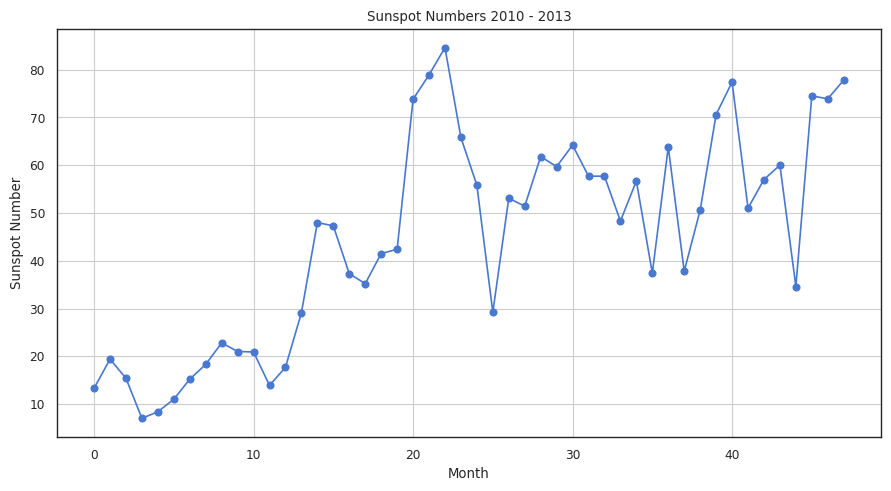

In [40]:
fig, ax = plt.subplots(figsize=(9,5))
sns.set_style("white")
blue, = sns.color_palette("muted", 1)
sns.set_context("paper")
plt.plot(x, y, marker = 'o', color=blue)
plt.title('Sunspot Numbers 2010 - 2013')
plt.ylabel('Sunspot Number')
plt.xlabel('Month')
plt.grid(True)
plt.tight_layout()

In [7]:
dfs_pkb = []
for i in range(13):
    filename = f'/home/chrisl2324/KIC6106145/New_Fit/mcmc{i}/modes_param.pkb'
    dfs_pkb.append(pd.read_csv(filename, sep=' ', header=None, names=['N', 'L_value', 'Nu', 'sigma', 'Ampl.', 'sigma_Ampl.', 'width', 'sigma_width','angle', 'sigma_angle', 'split', 'sigma_split', 'asym', 'sigma_asym'], skiprows=13))

In [8]:
# N value is off by 1 systematically

for df in dfs_pkb:
    df.loc[df['L_value'] == 0, 'N'] = df['N'] - 1

In [9]:
# Dictionaries to store indices and values
indices_dict_l0 = {}
values_dict_l0 = {}
std_values_dict_l0 = {}

# Loop over N values to collect frequency data
for N in range(15, 24):
    frequency_data_l0 = []
    
    # Loop through each DataFrame in dfs_pkb
    for index, df in enumerate(dfs_pkb):
        # Filter rows for N and L=0
        filtered_rows = df[(df['N'] == N) & (df['L_value'] == 0)]
        if not filtered_rows.empty:
            frequency_data_l0.extend([(index, row['Nu'], row['sigma']) for _, row in filtered_rows.iterrows()])
    
    # Store indices, frequencies, and standard deviations in dictionaries
    indices_dict_l0[N] = [idx for idx, _, _ in frequency_data_l0]
    values_dict_l0[N] = [value*1e-3 for _, value, _ in frequency_data_l0]  # Convert to mHz
    std_values_dict_l0[N] = [sigma*1e-3 for _, _, sigma in frequency_data_l0]  # Convert to mHz

In [10]:
# Dictionaries to store indices and values
indices_dict_l1 = {}
values_dict_l1 = {}
std_values_dict_l1 = {}

# Loop over N values to collect frequency data
for N in range(15, 25):
    frequency_data_l1 = []
    
    # Loop through each DataFrame in dfs_pkb
    for index, df in enumerate(dfs_pkb):
        # Filter rows for N and L=1
        filtered_rows = df[(df['N'] == N) & (df['L_value'] == 1)]
        if not filtered_rows.empty:
            frequency_data_l1.extend([(index, row['Nu'], row['sigma']) for _, row in filtered_rows.iterrows()])
    
    # Store indices, frequencies, and standard deviations in dictionaries
    indices_dict_l1[N] = [idx for idx, _, _ in frequency_data_l1]
    values_dict_l1[N] = [value*1e-3 for _, value, _ in frequency_data_l1]  # Convert to mHz
    std_values_dict_l1[N] = [sigma*1e-3 for _, _, sigma in frequency_data_l1]  # Convert to mHz


In [11]:
# Dictionaries to store indices and values
indices_dict_l2 = {}
values_dict_l2 = {}
std_values_dict_l2 = {}

# Loop over N values to collect frequency data
for N in range(15, 24):
    frequency_data_l2 = []
    
    # Loop through each DataFrame in dfs_pkb
    for index, df in enumerate(dfs_pkb):
        # Filter rows for N and L=1
        filtered_rows = df[(df['N'] == N) & (df['L_value'] == 2)]
        if not filtered_rows.empty:
            frequency_data_l2.extend([(index, row['Nu'], row['sigma']) for _, row in filtered_rows.iterrows()])
    
    # Store indices, frequencies, and standard deviations in dictionaries
    indices_dict_l2[N] = [idx for idx, _, _ in frequency_data_l2]
    values_dict_l2[N] = [value*1e-3 for _, value, _ in frequency_data_l2]  # Convert to mHz
    std_values_dict_l2[N] = [sigma*1e-3 for _, _, sigma in frequency_data_l2]  # Convert to mHz

In [12]:
# Store mean and std dev. for L=0
values_l0 = [values_dict_l0[i] for i in range(15, 24)]
mean_values_l0 = []
std_values_l0 = []
for value in values_l0:
    mean_values_l0.append(np.mean(value))
    std_values_l0.append(np.std(value))

# Store mean and std dev. for L=1
values_l1 = [values_dict_l1[i] for i in range(16, 24)]
mean_values_l1 = []
std_values_l1 = []
for value in values_l1:
    mean_values_l1.append(np.mean(value))
    std_values_l1.append(np.std(value))

# Store mean and std dev. for L=2
values_l2 = [values_dict_l2[i] for i in range(15, 24)]
mean_values_l2 = []
std_values_l2 = []
for value in values_l2:
    mean_values_l2.append(np.mean(value))
    std_values_l2.append(np.std(value))

In [13]:
# Compute relative variations
relative_variations_l0 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l0]
relative_variations_l1 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l1]
relative_variations_l2 = [(np.array(value) - np.mean(value))/np.mean(value) for value in values_l2]

In [14]:
# average frequencies over all n and l values

frequencies = []
for df in dfs_pkb:
    frequency = np.sum(df['Nu'])
    length = len(df)
    frequencies.append((frequency/length)*1e-3)

In [23]:
binned_sunspot_values = np.array_split(y, 13)  # Split into 13 bins to conicide with frequency tables
avg_sunspots = [round(np.mean(bin), 2) for bin in binned_sunspot_values]  

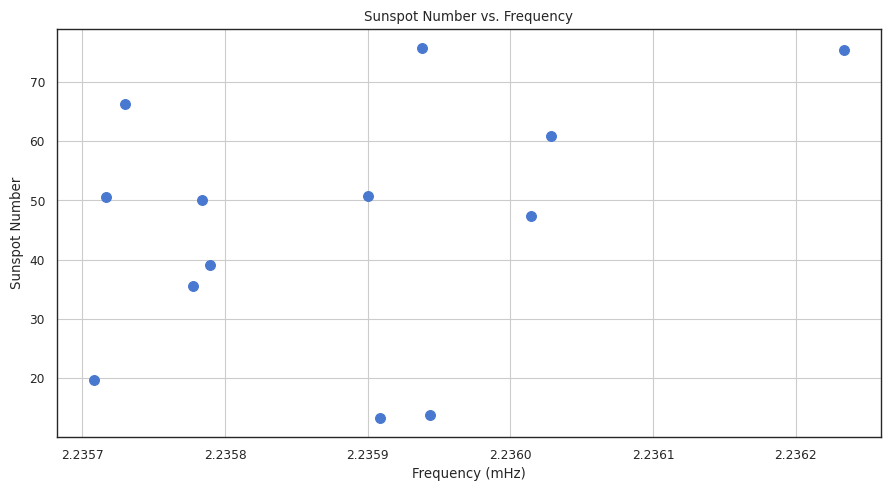

In [43]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.set_style("white")
blue, = sns.color_palette("muted", 1)
sns.set_context("paper")
plt.scatter(frequencies, avg_sunspots, color=blue, s=50)
plt.xlabel('Frequency (mHz)')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number vs. Frequency')
plt.grid(True)
plt.tight_layout()

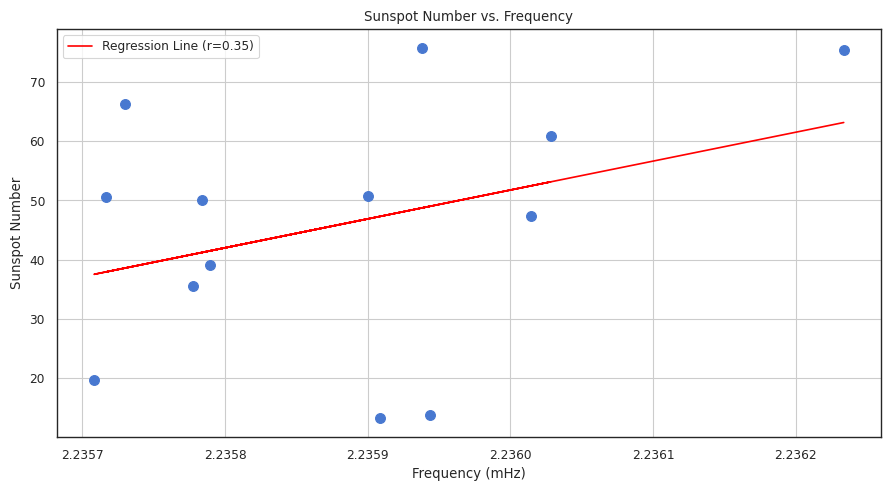

In [56]:
from scipy.stats import linregress

# calculate regression line
slope, intercept, r_value, p_value, std_err = linregress(frequencies, avg_sunspots)

fig, ax = plt.subplots(figsize = (9, 5))
sns.set_style("white")
blue, = sns.color_palette("muted", 1)
sns.set_context("paper")
plt.plot(frequencies, intercept + slope*np.array(frequencies), 'r', label=f"Regression Line (r={r_value:.2f})")
plt.scatter(frequencies, avg_sunspots, color=blue, s=50)
plt.xlabel('Frequency (mHz)')
plt.ylabel('Sunspot Number')
plt.title('Sunspot Number vs. Frequency')
plt.grid(True)
plt.legend()
plt.tight_layout()

In [65]:
import pickle

data = {
    "sunspot_numbers": y,  # sunspot values
    "frequencies": frequencies,  # Measured frequencies
    "time_points": x, # Corresponding month values
    "relative_variationsl0": relative_variations_l0, # relative freq changes
    "relative_variationsl1": relative_variations_l1,
    "relative_variationsl2": relative_variations_l2,
    "values_l0": values_l0, # original freq values
    "values_l1": values_l1,
    "values_l2": values_l2,   
}

# Save to a binary file
with open("/home/chrisl2324/KIC6106145/sunspot_data/kic6106415.pkl", "wb") as f:
    pickle.dump(data, f)
